In [1]:
import matplotlib.pyplot as plt
import pandas as pd

wide_df = pd.read_csv('wide_data.csv', parse_dates=['date'])  #parse:구문분석(파싱)..구성 성분으로 분해하고 위계 관계 분석하여 문장의 구조 결
long_df = pd.read_csv(
    'long_data.csv', 
    usecols=['date', 'datatype', 'value'], 
    parse_dates=['date']
)[['date', 'datatype', 'value']] # sort columns

In [3]:
wide_df.head(6)

date  TMAX  TMIN  TOBS
0 2018-10-01  21.1   8.9  13.9
1 2018-10-02  23.9  13.9  17.2
2 2018-10-03  25.0  15.6  16.1
3 2018-10-04  22.8  11.7  11.7
4 2018-10-05  23.3  11.7  18.9
5 2018-10-06  20.0  13.3  16.1

In [5]:
wide_df.describe(include='all')

date       TMAX       TMIN       TOBS
count                   31  31.000000  31.000000  31.000000
mean   2018-10-16 00:00:00  16.829032   7.561290  10.022581
min    2018-10-01 00:00:00   7.800000  -1.100000  -1.100000
25%    2018-10-08 12:00:00  12.750000   2.500000   5.550000
50%    2018-10-16 00:00:00  16.100000   6.700000   8.300000
75%    2018-10-23 12:00:00  21.950000  13.600000  16.100000
max    2018-10-31 00:00:00  26.700000  17.800000  21.700000
std                    NaN   5.714962   6.513252   6.596550

In [7]:
#그림에서 한글 처리를 위해 폰트 적용하기
import matplotlib as mpl
import matplotlib.font_manager as fm

#윈도우 한글 폰트 적용
path='C:/Windows/Fonts/Malgun.ttf'

#그림에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False

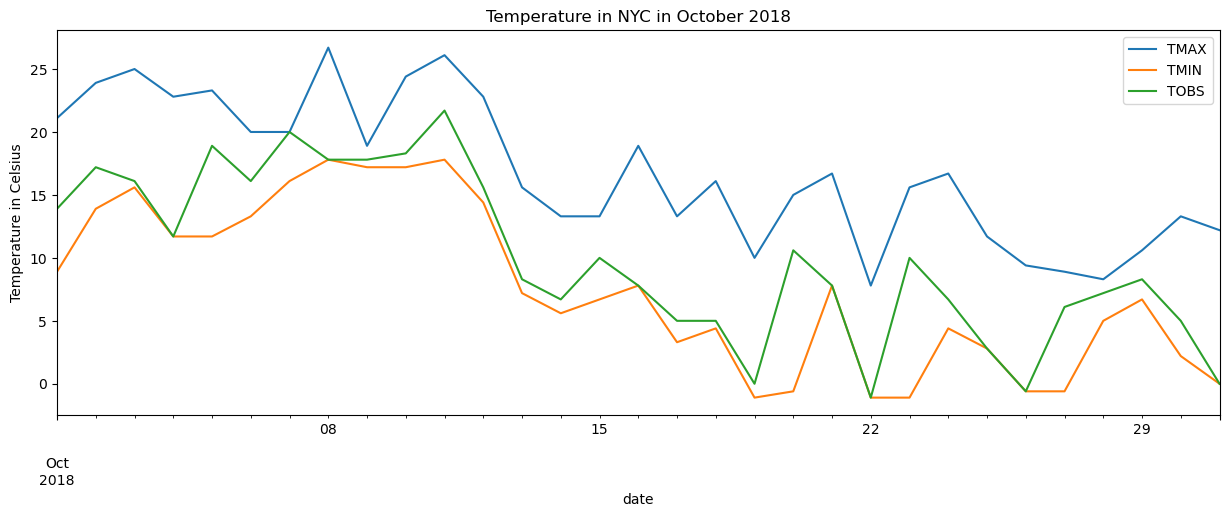

In [8]:
wide_df.plot(
    x='date', y=['TMAX', 'TMIN', 'TOBS'], figsize=(15, 5), 
    title='Temperature in NYC in October 2018'
).set_ylabel('Temperature in Celsius')
plt.show()

In [9]:
long_df.head(6)

datatype       date  value
0     TMAX 2018-10-01   21.1
1     TMIN 2018-10-01    8.9
2     TOBS 2018-10-01   13.9
3     TMAX 2018-10-02   23.9
4     TMIN 2018-10-02   13.9
5     TOBS 2018-10-02   17.2

In [10]:
long_df.describe(include='all')

datatype                 date      value
count        93                   93  93.000000
unique        3                  NaN        NaN
top        TMAX                  NaN        NaN
freq         31                  NaN        NaN
mean        NaN  2018-10-16 00:00:00  11.470968
min         NaN  2018-10-01 00:00:00  -1.100000
25%         NaN  2018-10-08 00:00:00   6.700000
50%         NaN  2018-10-16 00:00:00  11.700000
75%         NaN  2018-10-24 00:00:00  17.200000
max         NaN  2018-10-31 00:00:00  26.700000
std         NaN                  NaN   7.362354

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


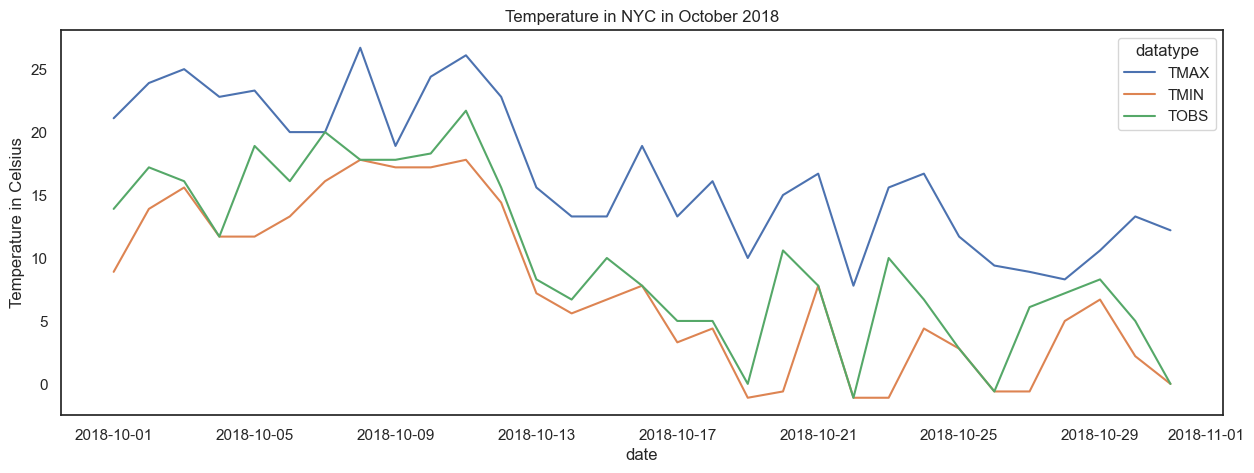

In [11]:
import seaborn as sns
sns.set(font='Malgun gothic', rc={'axes.unicode_minus':False})
sns.set(rc={'figure.figsize': (15, 5)}, style='white')

ax = sns.lineplot(
    data=long_df, x='date', y='value', hue='datatype'
)
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in October 2018')
plt.show()


#오류메세지가 아니구 버전이 달라서 뜨는 경고메세지 정도라고 생각하면 된당

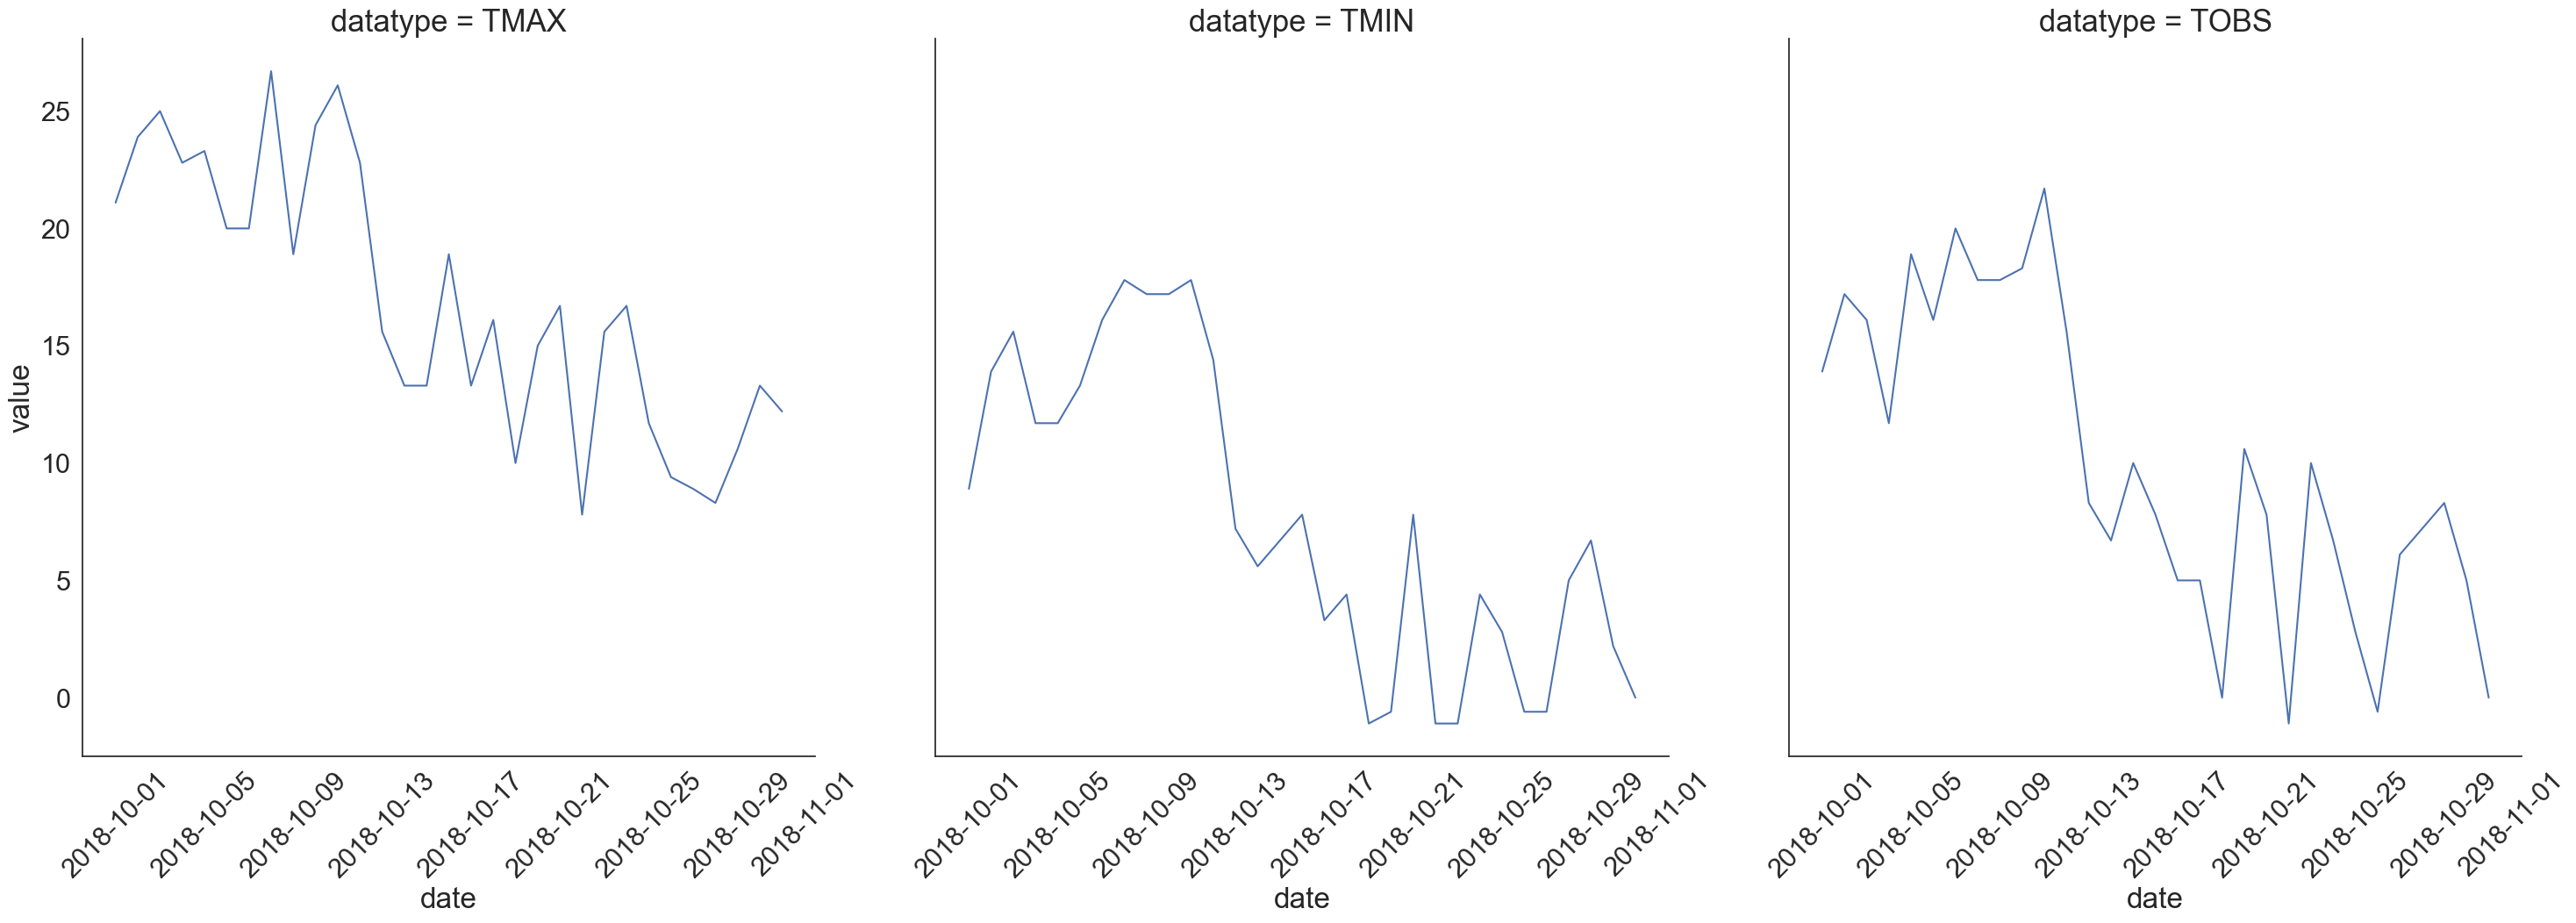

In [12]:
sns.set(
    rc={'figure.figsize': (20, 10)}, style='white', font_scale=2
)

g = sns.FacetGrid(long_df, col='datatype', height=10)
g = g.map(plt.plot, 'date', 'value')
g.set_titles(size=25)
g.set_xticklabels(rotation=45)
plt.show()

 # 데이터 정제

In [14]:
import pandas as pd

df=pd.read_csv('nyc_temperatures.csv')
df.head()

date datatype            station attributes  value
0  2018-10-01T00:00:00     TAVG  GHCND:USW00014732      H,,S,   21.2
1  2018-10-01T00:00:00     TMAX  GHCND:USW00014732   ,,W,2400   25.6
2  2018-10-01T00:00:00     TMIN  GHCND:USW00014732   ,,W,2400   18.3
3  2018-10-02T00:00:00     TAVG  GHCND:USW00014732      H,,S,   22.7
4  2018-10-02T00:00:00     TMAX  GHCND:USW00014732   ,,W,2400   26.1

### 열 이름 바꾸기

In [15]:
df.columns

Index(['date', 'datatype', 'station', 'attributes', 'value'], dtype='object')

In [16]:
df.rename(
    columns={'value' : 'temp_C', 'attributes' : 'flags'}, inplace=True
             )

In [17]:
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

In [19]:
df.rename(str.upper, axis='columns').columns #axis=rows로 바꾸면 인덱스를 대문자로 바꿀 수 있음!

Index(['DATE', 'DATATYPE', 'STATION', 'FLAGS', 'TEMP_C'], dtype='object')

### 유형 변환

In [20]:
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

In [21]:
df.loc[:, 'date']=pd.to_datetime(df.date)
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

In [22]:
df.date.describe

<bound method NDFrame.describe of 0     2018-10-01 00:00:00
1     2018-10-01 00:00:00
2     2018-10-01 00:00:00
3     2018-10-02 00:00:00
4     2018-10-02 00:00:00
             ...         
88    2018-10-30 00:00:00
89    2018-10-30 00:00:00
90    2018-10-31 00:00:00
91    2018-10-31 00:00:00
92    2018-10-31 00:00:00
Name: date, Length: 93, dtype: object>

In [23]:
pd.date_range(start='2018-10-25', periods=2, freq='D').tz_localize('EST') #timezone localize : 표준시간대설정

DatetimeIndex(['2018-10-25 00:00:00-05:00', '2018-10-26 00:00:00-05:00'], dtype='datetime64[ns, EST]', freq=None)

In [26]:
#파싱 : 데이터를 조립해서 특정한 데이터만을 추출한다는 의미를 내포!

eastern = pd.read_csv('nyc_temperatures.csv', index_col='date', parse_dates=True).tz_localize('EST')
eastern.head()

datatype            station attributes  value
date                                                                   
2018-10-01 00:00:00-05:00     TAVG  GHCND:USW00014732      H,,S,   21.2
2018-10-01 00:00:00-05:00     TMAX  GHCND:USW00014732   ,,W,2400   25.6
2018-10-01 00:00:00-05:00     TMIN  GHCND:USW00014732   ,,W,2400   18.3
2018-10-02 00:00:00-05:00     TAVG  GHCND:USW00014732      H,,S,   22.7
2018-10-02 00:00:00-05:00     TMAX  GHCND:USW00014732   ,,W,2400   26.1

In [27]:
eastern.tz_convert('UTC').head()

datatype            station attributes  value
date                                                                   
2018-10-01 05:00:00+00:00     TAVG  GHCND:USW00014732      H,,S,   21.2
2018-10-01 05:00:00+00:00     TMAX  GHCND:USW00014732   ,,W,2400   25.6
2018-10-01 05:00:00+00:00     TMIN  GHCND:USW00014732   ,,W,2400   18.3
2018-10-02 05:00:00+00:00     TAVG  GHCND:USW00014732      H,,S,   22.7
2018-10-02 05:00:00+00:00     TMAX  GHCND:USW00014732   ,,W,2400   26.1

In [29]:
eastern.tz_localize(None).to_period('M').index

PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-